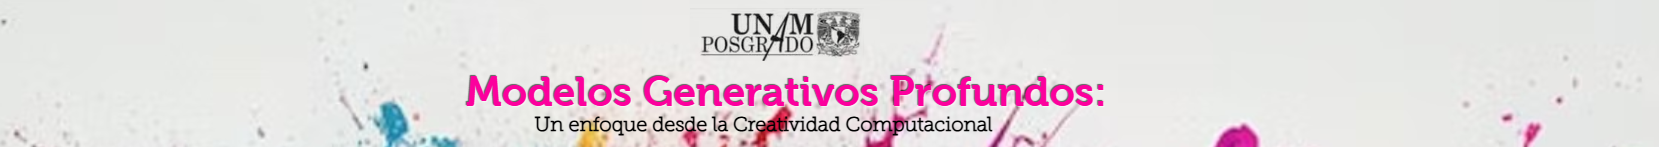

# Perceptrón Multicapa (MLP) para clasificación de imágenes

En esta libreta aprenderemos los pasos para implementar un clasificador (discriminador) de imágenes (las del conjunto de datos CIFAR-10), usando un perceptrón multicapa y Keras.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

## 1. Preparar los datos

**1.1 Descargar el dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


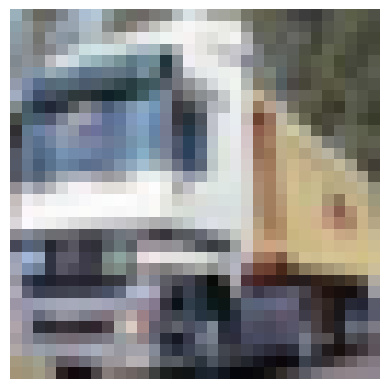

In [4]:
plt.imshow(x_train[1])
plt.axis('off')
plt.show()

**1.2 Escalar los valores de las imágenes**


In [5]:
# Normalizar el dataset 

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [6]:
x_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

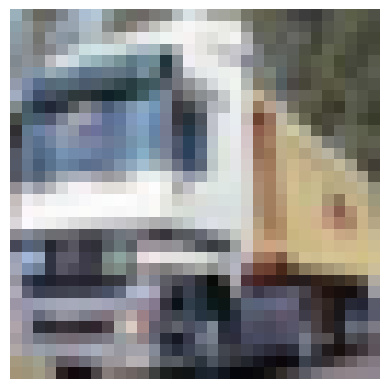

In [7]:
plt.imshow(x_train[1])
plt.axis('off')
plt.show()

**1.3 Codificar las etiquetas con one-hot-encoding.**


In [8]:
# To categorical

y_train = utils.to_categorical(y_train, num_classes=10)
y_test = utils.to_categorical(y_test, num_classes=10)

Veamos las primeras 10 imágenes del conjunto de entrenamiento junto con sus etiquetas codificadas usando one-hot encoding.

In [9]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

## 2. Construir el modelo <a name="build"></a>

In [10]:
# Clasificador de CIFAR10

model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



/Users/roicort/GitHub/PCIC/GenAI/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Podemos utilizar el método <b>model.summary()</b> para inspeccionar la forma de la red en cada capa.

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,640,330 (6.26 MB)

 Trainable params: 1,640,330 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Compilar el modelo <a name="compile"></a>

En este paso, compilamos el modelo con un optimizador y una función de pérdida. También pasamos al método compile del modelo un parámetro metrics donde podemos especificar cualquier métrica adicional que nos gustaría reportar durante el entrenamiento, como el accuracy.

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 4. Entrenar el modelo <a name="train"></a>

In [13]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3255 - loss: 1.8787 - val_accuracy: 0.3868 - val_loss: 1.7149
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3961 - loss: 1.6808 - val_accuracy: 0.4111 - val_loss: 1.6436
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4303 - loss: 1.5913 - val_accuracy: 0.4440 - val_loss: 1.5698
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4531 - loss: 1.5341 - val_accuracy: 0.4653 - val_loss: 1.5071
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4664 - loss: 1.4951 - val_accuracy: 0.4557 - val_loss: 1.5427
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4765 - loss: 1.4643 - val_accuracy: 0.4707 - val_loss: 1.4781
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4869 - loss: 1.4385 - val_accuracy: 0.4800 - val_loss: 1.4702
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4948 - loss: 1.4122 - val_accuracy: 0.

## 5. Evaluar el modelo

Hasta ahora sabemos que el modelo tiene un desempeño del 51.67% en el conjunto de entrenamiento, pero ¿cómo se desempeña con imágenes que no ha visto? Para contestar esta pregunta, podemos usar el método evaluate que provee Keras.

In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4881 - loss: 1.4361  


[1.4361367225646973, 0.48809999227523804]

La salida es una lista de las métricas que estamos monitoreando: entropía cruzada categórica y precisión. Podemos observar que la precisión del modelo es aún del 49.0% incluso en imágenes que nunca ha visto antes. Cabe destacar que, si el modelo adivinara al azar, lograría aproximadamente un 10% de precisión (porque hay 10 clases), por lo que un 49.0% es un buen resultado, considerando que hemos utilizado una red neuronal muy básica.

Podemos observar algunas de las predicciones en el conjunto de prueba utilizando el <b>método predict</b>: <br>
<b>1.- preds</b> es un arreglo de forma [10000, 10], es decir, un vector de 10 probabilidades de clase para cada observación. <br>
<b>2.-</b>Convertimos este arreglo de probabilidades en una única predicción utilizando la función argmax de numpy. Aquí, axis = -1 le indica a la función que colapse el arreglo sobre la última dimensión (la dimensión de las clases), de modo que la forma de preds_single sea entonces [10000, 1]. <br>
<b>3.-actual_single</b> contiene la etiqueta real esperada.

In [15]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


Podemos visualizar algunas de las imágenes junto con sus etiquetas y predicciones utilizando el siguiente código:

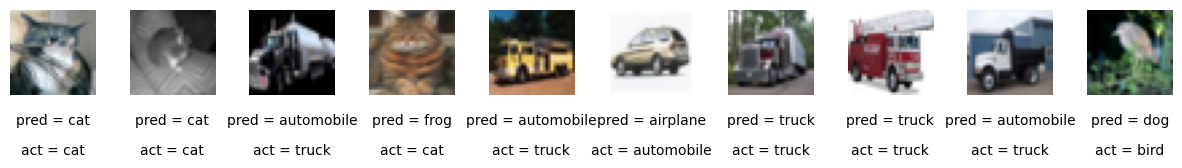

In [16]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

Como se esperaría, alrededor del 50% son correctas.